<a href="https://colab.research.google.com/github/yashika-ishi/CSI_Assignments_2025/blob/main/week6_assignment_model_evaluation_and_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Celebal Technologies**
*Celebel Summer Internship (CSI)*
<br>
WEEK-6
<br>
Assignment : Model Evaluation and Hyperparameter Tuning
<br>
Description:
<br>
1. Train multiple machine learning models and evaluate their performance using metrics such as accuracy, precision, recall, and F1-score. Implement hyperparameter tuning techniques like GridSearchCV and RandomizedSearchCV to optimize model parameters. Analyze the results to select the best-performing model.<br>
<br>Resources :<br>
https://www.kdnuggets.com/hyperparameter-tuning-gridsearchcv-and-randomizedsearchcv-explained

 DATASET:  Wine Dataset (the built-in dataset of scikit-learn)

***By: Yashika***

# **Step 1: Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Step 2: Load the Dataset**

In [ ]:
print("Loading Wine Dataset")
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names) # Features (e.g., alcohol, malic_acid)
y = pd.Series(wine.target) # Target variable (wine class: 0, 1, or 2)

print(f"Successfully loaded Wine dataset.")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {wine.target_names}")
print("\nFirst 5 rows of features:\n", X.head())
print("\nDistribution of target classes:\n", y.value_counts())


Loading Wine Dataset
Successfully loaded Wine dataset.
Number of samples: 178
Number of features: 13
Target classes: ['class_0' 'class_1' 'class_2']

First 5 rows of features:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24         

# **Step 3: Split Data into Training and Testing Sets**

In [ ]:
print("Splitting Data into Training and Testing Sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set shape (X_train): {X_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing target shape (y_test): {y_test.shape}")

Splitting Data into Training and Testing Sets
Training set shape (X_train): (133, 13)
Testing set shape (X_test): (45, 13)
Training target shape (y_train): (133,)
Testing target shape (y_test): (45,)


# **Step 4: Feature Standardization**

In [ ]:
print("Standardizing Features using StandardScaler")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features successfully standardized.")
print(f"Shape of scaled training data: {X_train_scaled.shape}")
print(f"Shape of scaled testing data: {X_test_scaled.shape}")

# List to store evaluation results for each model
results = []
# Dictionary to store GridSearchCV cv_results_ for detailed visualization
grid_search_results_details = {}

Standardizing Features using StandardScaler
Features successfully standardized.
Shape of scaled training data: (133, 13)
Shape of scaled testing data: (45, 13)


# **Step 5: Train and Tune Machine Learning Models**
1. Random Forest Classification Model
2. Support Vector Machine (SVM)
3. Logistic Regression

# **Step 5.1: Random Forest Classification Model**

In [ ]:
print(" Training and Tuning: Random Forest Classifier ")
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the tree (None means unlimited)
    'min_samples_split': [2, 5],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]       # Minimum number of samples required to be at a leaf node
}

 Training and Tuning: Random Forest Classifier 


# **Step 5.1.1: Performing GridSearchCV**

In [ ]:
# GridSearchCV performs an exhaustive search over the specified parameter values.
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
print("Starting GridSearchCV for Random Forest")
rf_grid_search.fit(X_train_scaled, y_train)

best_rf_model = rf_grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test_scaled)

# Evaluate the best Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted') # 'weighted' accounts for class imbalance
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

results.append({
    'Model': 'Random Forest',
    'Best Hyperparameters': rf_grid_search.best_params_,
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1
})
grid_search_results_details['Random Forest'] = rf_grid_search.cv_results_ # Store full results for later plotting
print(f"Random Forest - Best Hyperparameters: {rf_grid_search.best_params_}")
print(f"Random Forest - Test Set Metrics:")
print(f"  Accuracy: {rf_accuracy:.4f}")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall: {rf_recall:.4f}")
print(f"  F1-Score: {rf_f1:.4f}")

Starting GridSearchCV for Random Forest
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest - Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Test Set Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000


# **Step 5.2:Support Vector Machine (SVM)**

In [ ]:
# --- Support Vector Machine (SVM) ---
print("Training and Tuning: Support Vector Machine (SVM)")
svm_param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter (inverse of regularization strength)
    'kernel': ['linear', 'rbf'],  # Specifies the kernel type ('linear' for linear boundaries, 'rbf' for non-linear)
    'gamma': ['scale', 'auto']    # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
                                  # 'scale' uses 1 / (n_features * X.var()), 'auto' uses 1 / n_features.
}

svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
print("Starting GridSearchCV for SVM...")
svm_grid_search.fit(X_train_scaled, y_train)

best_svm_model = svm_grid_search.best_estimator_
svm_predictions = best_svm_model.predict(X_test_scaled)

# Evaluate the best SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

results.append({
    'Model': 'SVM',
    'Best Hyperparameters': svm_grid_search.best_params_,
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'F1-Score': svm_f1
})
grid_search_results_details['SVM'] = svm_grid_search.cv_results_
print(f"SVM - Best Hyperparameters: {svm_grid_search.best_params_}")
print(f"SVM - Test Set Metrics:")
print(f"  Accuracy: {svm_accuracy:.4f}")
print(f"  Precision: {svm_precision:.4f}")
print(f"  Recall: {svm_recall:.4f}")
print(f"  F1-Score: {svm_f1:.4f}")

Training and Tuning: Support Vector Machine (SVM)
Starting GridSearchCV for SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVM - Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVM - Test Set Metrics:
  Accuracy: 0.9556
  Precision: 0.9569
  Recall: 0.9556
  F1-Score: 0.9554


# **Step 5.3: Logistic Regression**

In [ ]:
# --- Logistic Regression ---
print("Training and Tuning: Logistic Regression")
# Define parameter grid for Logistic Regression.
lr_param_grid_filtered = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.1, 1, 10]}
]

lr_grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=200), lr_param_grid_filtered, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
print("Starting GridSearchCV for Logistic Regression...")
lr_grid_search.fit(X_train_scaled, y_train)

best_lr_model = lr_grid_search.best_estimator_
lr_predictions = best_lr_model.predict(X_test_scaled)

# Evaluate the best Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

results.append({
    'Model': 'Logistic Regression',
    'Best Hyperparameters': lr_grid_search.best_params_,
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1-Score': lr_f1
})
grid_search_results_details['Logistic Regression'] = lr_grid_search.cv_results_
print(f"Logistic Regression - Best Hyperparameters: {lr_grid_search.best_params_}")
print(f"Logistic Regression - Test Set Metrics:")
print(f"  Accuracy: {lr_accuracy:.4f}")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall: {lr_recall:.4f}")
print(f"  F1-Score: {lr_f1:.4f}")

Training and Tuning: Logistic Regression
Starting GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Logistic Regression - Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression - Test Set Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000


# **Step 6: Presenting Final Model Performance Results**
1. Accuracy
2. Precision
3. Recall
4. F1-Score

In [ ]:
print("--- Model Performance Comparison ---")
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='F1-Score', ascending=False)
print("Summary of Model Performance and Best Hyperparameters:\n")
print(results_df_sorted.to_string(index=False)) # index=False to not print DataFrame index

# Select the best performing model based on F1-Score (or Accuracy, depending on priority)
best_model_row = results_df_sorted.iloc[0] # The first row after sorting by F1-Score
print(f"\n\nBest Performing Model (based on F1-Score):")
print(f"Model: {best_model_row['Model']}")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"Precision: {best_model_row['Precision']:.4f}")
print(f"Recall: {best_model_row['Recall']:.4f}")
print(f"F1-Score: {best_model_row['F1-Score']:.4f}")
print(f"Best Hyperparameters: {best_model_row['Best Hyperparameters']}")


--- Model Performance Comparison ---
Summary of Model Performance and Best Hyperparameters:

              Model                                                                    Best Hyperparameters  Accuracy  Precision   Recall  F1-Score
      Random Forest {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}  1.000000   1.000000 1.000000  1.000000
Logistic Regression                                        {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}  1.000000   1.000000 1.000000  1.000000
                SVM                                          {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}  0.955556   0.956944 0.955556  0.955431


Best Performing Model (based on F1-Score):
Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# **Step 7: Plotting Results**

# **Step 7.1: Bar Chart**

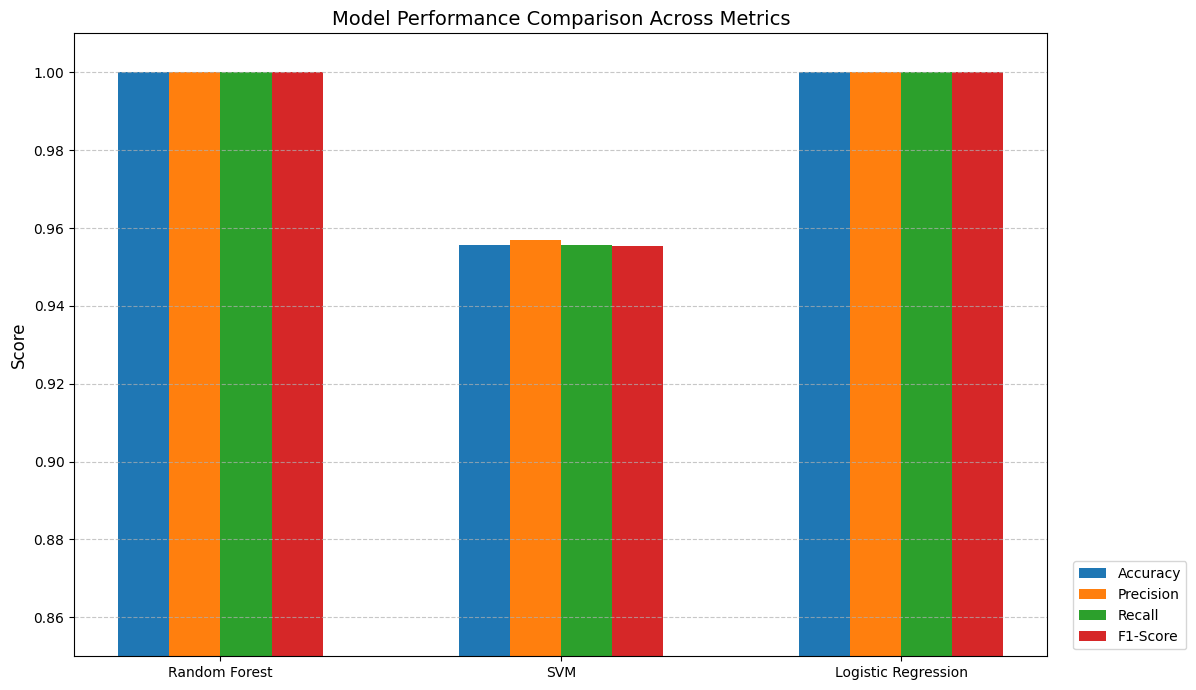

Bar chart for Model Performance Comparison displayed.


In [ ]:
# Bar Chart for Overall Model Performance Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models = results_df['Model'].tolist()
metric_values = results_df[metrics].values

x = np.arange(len(models))  # the label locations for model groups
width = 0.15  # the width of each bar for a metric

plt.figure(figsize=(12, 7)) # Create a figure and axes for the plot
ax = plt.subplot(111) # A single subplot

# Plot bars for each metric
for i, metric in enumerate(metrics):
    offset = width * (i - (len(metrics) - 1) / 2) # Calculate offset to group bars
    ax.bar(x + offset, metric_values[:, i], width, label=metric)

# Add labels, title, and customize x-axis ticks
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison Across Metrics', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend(loc='lower right', bbox_to_anchor=(1.15, 0), fontsize=10) # Position legend outside plot
ax.set_ylim(0.85, 1.01) # Adjust y-axis for better visualization if scores are high
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
plt.tight_layout() # Adjust plot to prevent labels from overlapping
plt.show()

print("Bar chart for Model Performance Comparison displayed.")

# **Step 7.2: Heatmap for SVM GridSearchCV Results**

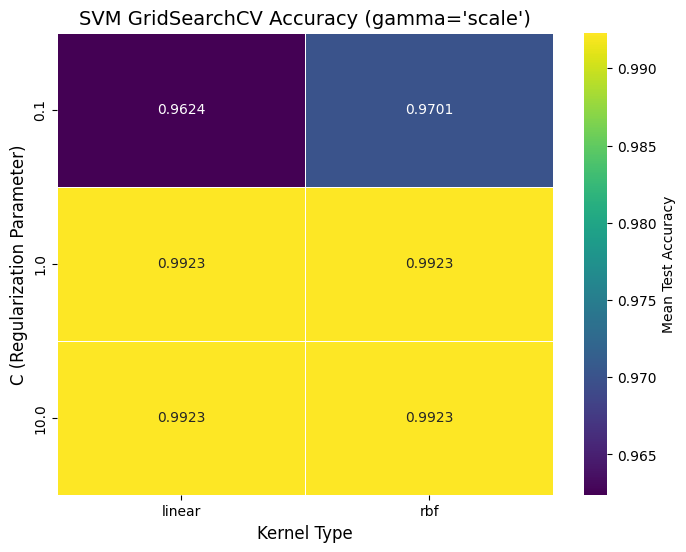

Heatmap for SVM GridSearchCV results displayed (C vs. Kernel).


In [ ]:
#  Heatmap for SVM GridSearchCV Results (C vs. Kernel for gamma='scale')
svm_cv_results_df = pd.DataFrame(grid_search_results_details['SVM'])

# Filter results for a specific gamma value to get a 2D plot
svm_results_filtered_gamma_scale = svm_cv_results_df[svm_cv_results_df['param_gamma'] == 'scale']

# Create a pivot table for the heatmap
pivot_table_svm = svm_results_filtered_gamma_scale.pivot_table(
    values='mean_test_score',
    index='param_C',
    columns='param_kernel'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_svm, annot=True, cmap='viridis', fmt=".4f",
            linewidths=.5, cbar_kws={'label': 'Mean Test Accuracy'})
plt.title('SVM GridSearchCV Accuracy (gamma=\'scale\')', fontsize=14)
plt.xlabel('Kernel Type', fontsize=12)
plt.ylabel('C (Regularization Parameter)', fontsize=12)
plt.show()

print("Heatmap for SVM GridSearchCV results displayed (C vs. Kernel).")

# **Step 7.3:  Heatmap for Random Forest GridSearchCV Results**

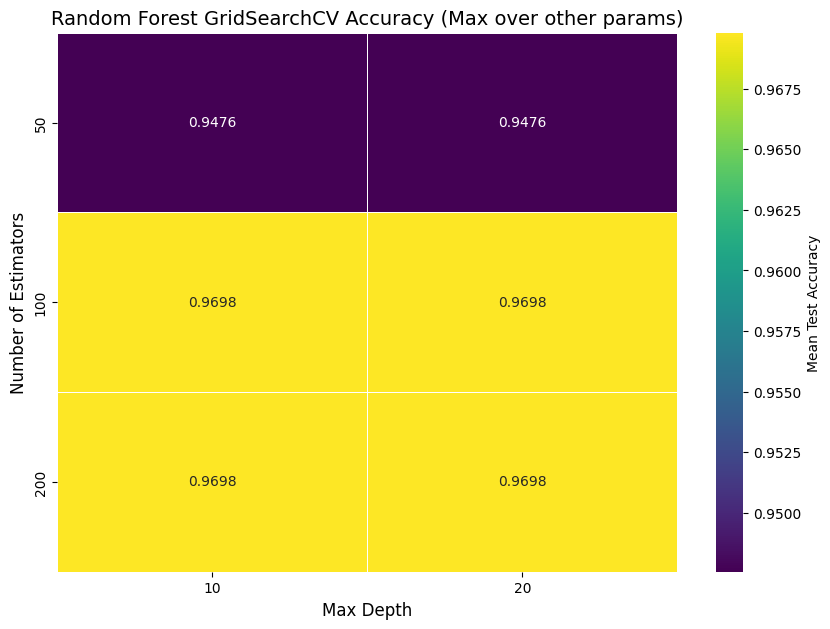

Heatmap for Random Forest GridSearchCV results displayed (n_estimators vs. max_depth).


In [ ]:
# Heatmap for Random Forest GridSearchCV Results (n_estimators vs. max_depth)
rf_cv_results_df = pd.DataFrame(grid_search_results_details['Random Forest'])

# Group by the two parameters we want to visualize and take the mean of the scores
rf_results_grouped = rf_cv_results_df.groupby(['param_n_estimators', 'param_max_depth'])['mean_test_score'].max().unstack()

plt.figure(figsize=(10, 7))
sns.heatmap(rf_results_grouped, annot=True, cmap='viridis', fmt=".4f",
            linewidths=.5, cbar_kws={'label': 'Mean Test Accuracy'})
plt.title('Random Forest GridSearchCV Accuracy (Max over other params)', fontsize=14)
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Number of Estimators', fontsize=12)
plt.show()

print("Heatmap for Random Forest GridSearchCV results displayed (n_estimators vs. max_depth).")
